<a href="https://colab.research.google.com/github/intercambioca-creator/Clase-19_-Proyecto_final_cv_NLP/blob/main/clase23_Alberto_Murcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diagnóstico y recomendación con IA: Caso Diabetes

En esta actividad trabajaremos con un dataset real de pacientes, buscando automatizar el diagnóstico de diabetes y sentar bases para un sistema de recomendación. El enfoque será fortalecer la limpieza de datos, el preprocesamiento y la comparación de dos modelos: K-Nearest Neighbors (KNN) y Random Forest.

El dataset que usaremos es el **Pima Indians Diabetes Dataset**, disponible en [UCI Machine Learning Repository](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) y en [este enlace CSV directo](https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv).

In [1]:
# 1. Importar librerías básicas
%pip install matplotlib seaborn --quiet
%pip install scikit-learn --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [3]:
import pandas as pd
df = pd.read_csv('diabetes.csv')


In [29]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(knn_opt, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [30]:
from google.colab import files
files.download('modelo_entrenado.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Explora el dataset:**  
- ¿Cuántas filas y columnas tiene?  
- ¿Qué variables aparecen?  
- ¿Cuál es la variable objetivo?

son 9 columnas y 768 filas;Variables:Pregnancies,Glucose,BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction,Age,Outcome; la variable objetivo es la glucosa

In [4]:
# Dimensiones y nombres de columnas
print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())
df.info()

Shape: (768, 9)
Columnas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Dimensiones y nombres de columnas
print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())
df.info()

Shape: (768, 9)
Columnas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Dimensiones y nombres de columnas
print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())
df.info()

Shape: (768, 9)
Columnas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Estadísticas básicas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Observa los resultados:**  
- ¿Detectas alguna variable que podría requerir atención especial (por ejemplo, ceros en variables donde no deberían haber ceros)?  
- ¿Notas outliers, valores atípicos o rangos extraños?

variables que requieren atencion:Glucose, BloodPressure, SkinThickness, Insulin, 'BMI', DiabetesPedigreeFunction, Age,


In [6]:
# Dimensiones y nombres de columnas
print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())
df.info()

Shape: (768, 9)
Columnas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# 3. Detección de valores nulos y ceros sospechosos
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\nConteo de ceros (potenciales datos faltantes):")
print((df.iloc[:, :-1] == 0).sum())

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Conteo de ceros (potenciales datos faltantes):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


### Diferencia entre valores nulos ($\text{NaN}$) y ceros ($0$) en datos

Es fundamental distinguir entre **valores nulos** y **ceros** en el análisis de datos:

**Valor nulo (`NaN`)**  
Significa que **el dato no existe**, está ausente, la celda está vacía o nunca se registró información. En pandas, los valores nulos aparecen como `NaN`.  
Ejemplo:

| Glucose | Insulin |
|---------|---------|
| 120     | 80      |
| *NaN*   | 60      |

→ Aquí “Glucose” es un valor nulo (dato ausente)

**Cero (`0`)**  
Es un **valor numérico válido**. La celda sí tiene dato y ese dato es cero.  
Ejemplo:

| Glucose | Insulin |
|---------|---------|
| 120     | 80      |
| 0       | 60      |

→ Aquí “Glucose” es cero (no nulo)

Por eso, en la limpieza de datos, es importante decidir cuándo un cero debe ser tratado como dato legítimo y cuándo como “dato faltante mal codificado”.




**Discusión:**  
En variables clínicas como presión, glucosa, insulina, etc., los ceros suelen ser imposibles (indican datos faltantes mal codificados).  ¿En qué variables crees que los ceros NO deberían existir?  
Vamos a imputar o eliminar según el caso.

glucosa, presión, insulina, pliegue cutáneo e IMC en estas variables no deben haber ceros; seguneste caso vamos a imputar.

In [8]:
# 4. Limpieza: Imputar ceros sospechosos con la mediana (excepto en 'Pregnancies' y 'Outcome')
vars_con_ceros_invalidos = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in vars_con_ceros_invalidos:
    mediana = df[col].median()
    df[col] = df[col].replace(0, mediana)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Revisa nuevamente las estadísticas.**  
¿Notas cambios en las variables?  
¿Por qué usamos la mediana y no el promedio para imputar?

si noto cammbios en las variables;usamos la mediana, porque la glucosa e insulina suelen tener valores extremos.

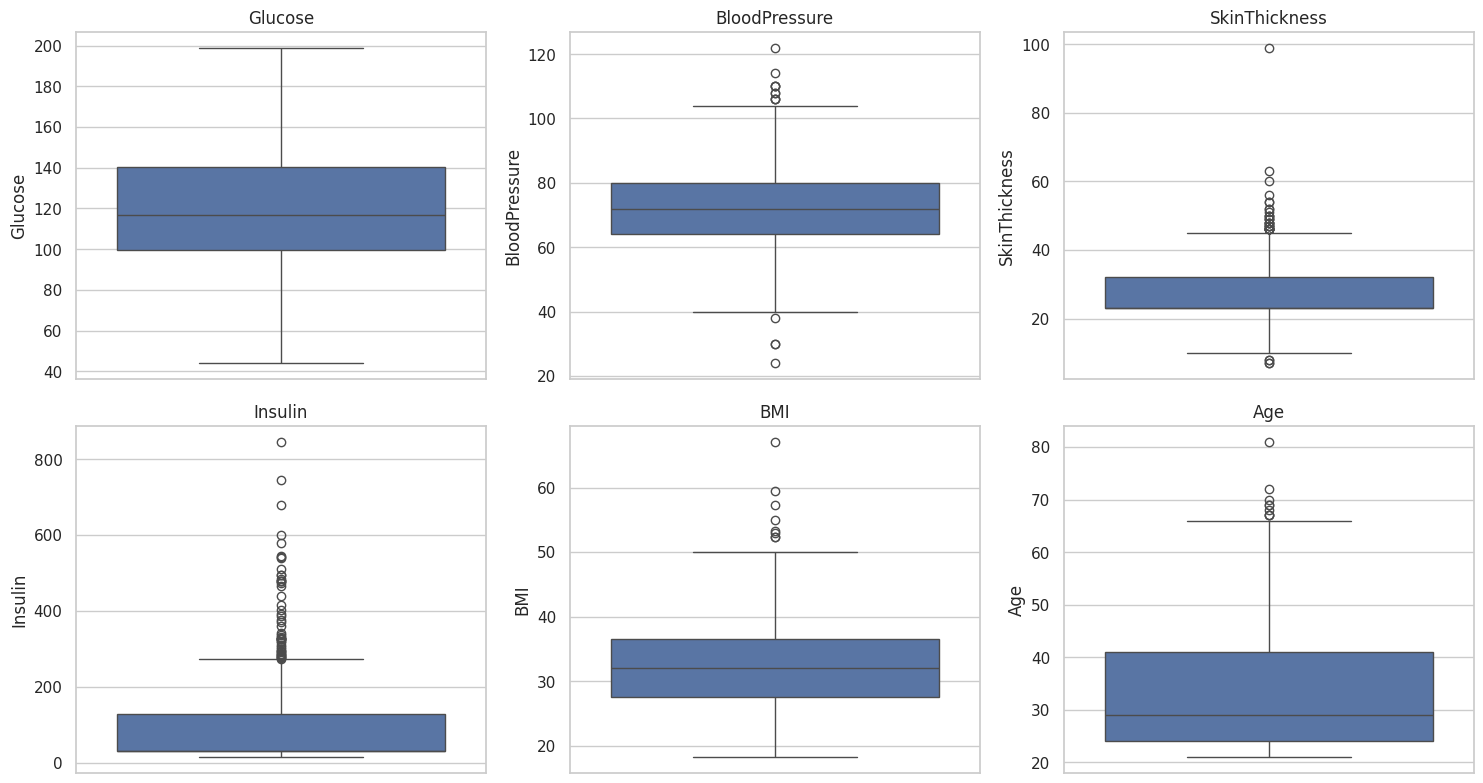

In [9]:
# 5. Visualización rápida para detectar posibles outliers
fig, axes = plt.subplots(2, 3, figsize=(15,8))
cols = vars_con_ceros_invalidos + ['Age']
for i, col in enumerate(cols):
    sns.boxplot(data=df, y=col, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
plt.tight_layout()
plt.show()

**Actividad:**  
Observa los boxplots.  
- ¿Qué variables muestran valores extremos (outliers)?  
- ¿Qué harías con ellos: eliminarlos, transformarlos o dejarlos?  
Discútelo antes de avanzar.

la insulina muestra valores extremos.En el casodela insulina lo transformo.

**Guía para interpretar los boxplots:**

- En cada boxplot, el **rectángulo** (la “caja”) muestra el rango entre el primer y tercer cuartil (Q1 y Q3).
- La **línea dentro de la caja** es la mediana (el valor central).
- Los **“bigotes”** se extienden hasta el valor máximo y mínimo que no se consideran outliers (generalmente 1.5 veces el rango intercuartílico).
- **Los puntos fuera del bigote** son considerados **outliers** o valores atípicos.

**¿Qué hacer con los outliers?**
- Si una variable muestra varios puntos fuera del bigote, esa variable tiene valores extremos y podría necesitar limpieza adicional.
- Opciones para tratar los outliers:
    - **Eliminarlos:** si sabes que son errores o casos imposibles.
    - **Transformarlos:** usando logaritmos, winsorización o recorte de valores extremos.
    - **Dejarlos:** si representan casos reales y válidos, aunque sean poco frecuentes.

No hay una única respuesta correcta: **la decisión depende del contexto y del impacto que estos valores tengan en el análisis y los modelos**.  
Discútelo en tu grupo antes de decidir cómo tratar los outliers.



In [10]:
# Calcular percentiles altos de la variable Insulin
percentiles = df['Insulin'].quantile([0.95, 0.99, 0.999])
print("Percentiles altos de Insulin:")
print(percentiles)


Percentiles altos de Insulin:
0.950    293.000
0.990    519.900
0.999    767.766
Name: Insulin, dtype: float64


In [11]:
# Calcular el valor del percentil 99 para Insulin
p99 = df['Insulin'].quantile(0.99)

# Winsorizar: recortar los valores superiores al percentil 99
df['Insulin'] = np.where(df['Insulin'] > p99, p99, df['Insulin'])

print(f"Todos los valores de Insulin ahora están por debajo de {p99:.2f}")


Todos los valores de Insulin ahora están por debajo de 519.90


### Nota clínica sobre valores de insulina

Diversos estudios y fuentes clínicas reportan que, en adultos sanos, los niveles de insulina en sangre en ayunas oscilan entre **2 y 25 µU/mL**.  
En personas con **resistencia a la insulina** o diabetes tipo 2, estos valores pueden aumentar significativamente, llegando en algunos casos a **100-200 µU/mL** después de una carga de glucosa o en estados de hiperinsulinemia.  
Sin embargo, valores persistentemente por encima de **300-400 µU/mL** son poco frecuentes, incluso en poblaciones diabéticas, y suelen estar asociados a condiciones clínicas excepcionales, errores de laboratorio o problemas en la captura de datos.

*Referencia: Bonora E, et al. "Homeostasis Model Assessment closely mirrors the glucose clamp technique in the assessment of insulin sensitivity: Studies in subjects with various degrees of glucose tolerance and insulin sensitivity." Diabetes Care, 2000; ADA Clinical Chemistry Guidelines, 2021.*

---

### Justificación de la limpieza por percentil 99

Aunque el dataset se compone de pacientes con diabetes, aplicar un recorte (“winsorización”) en el percentil 99 de la variable `Insulin` es una práctica estadística razonable para limitar el impacto de valores atípicos extremos, que pueden deberse a errores o a condiciones muy poco frecuentes.  
De este modo, protegemos el análisis y la capacidad de generalización del modelo, conservando la gran mayoría de los casos reales —incluyendo pacientes con insulina elevada por resistencia— y reduciendo la influencia de registros poco fiables.

> *Esta decisión se toma para asegurar que los modelos aprendan sobre patrones representativos de la población diabética, sin verse distorsionados por datos extremos o potencialmente erróneos.*


### Fundamento teórico del método K-Nearest Neighbors (KNN)

El algoritmo **K-Nearest Neighbors (KNN)** es un clasificador supervisado no paramétrico que predice la clase de una muestra observando las clases de sus “k” vecinos más cercanos en el espacio de características.

#### ¿Cómo funciona?

1. Dados los datos de entrenamiento $\mathcal{D} = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, donde $\mathbf{x}_i \in \mathbb{R}^p$ es un vector de características y $y_i$ la etiqueta de clase.
2. Para clasificar una nueva muestra $\mathbf{x}$:
   - Se calcula la **distancia** entre $\mathbf{x}$ y cada $\mathbf{x}_i$ del conjunto de entrenamiento (usualmente, **distancia euclidiana**: $\|\mathbf{x} - \mathbf{x}_i\|_2$).
   - Se identifican los $k$ puntos de entrenamiento más cercanos a $\mathbf{x}$.
   - Se asigna la clase **más frecuente** entre esos $k$ vecinos:  
     $$
     \hat{y} = \mathrm{mode}(\{y_{i_1}, y_{i_2}, ..., y_{i_k}\})
     $$
     donde $i_1, ..., i_k$ son los índices de los $k$ vecinos más próximos.

#### ¿Por qué es importante escalar las variables?

KNN **depende completamente de las distancias** entre los puntos en el espacio de características. Si las variables tienen diferentes escalas (por ejemplo, edad en años y glucosa en mg/dL), las variables de mayor rango dominarán la métrica de distancia, distorsionando el resultado.

Por eso, **antes de usar KNN es fundamental escalar todas las variables numéricas** (con StandardScaler o MinMaxScaler), para que cada característica tenga la misma influencia en el cálculo de distancia.

---

En el código, la variable `X` contiene todas las características (excepto la columna objetivo `Outcome`), y `y` contiene las clases.  
La división entre entrenamiento y prueba (`train_test_split`) permite evaluar el desempeño del modelo sobre datos no vistos.  
El escalado con `StandardScaler` asegura que todas las variables numéricas tengan media cero y varianza uno, haciendo el cálculo de distancias más justo y efectivo para KNN.

---

**Referencia:**  
Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. *IEEE Transactions on Information Theory*, 13(1), 21-27. https://doi.org/10.1109/TIT.1967.1053964


### Diferencia intuitiva entre KNN y K-Means

- **KNN (K-Nearest Neighbors)** es como preguntarle a tus vecinos cómo debes etiquetar algo:
  - Imagínate que tienes una fruta misteriosa. Buscas las frutas más cercanas (en forma, color, peso, etc.) y le preguntas a cada una: “¿Tú qué eres?”  
  - Si la mayoría responde “manzana”, entonces clasificas la fruta misteriosa como manzana.
  - **KNN necesita que ya conozcas la etiqueta (clase) de tus ejemplos previos.**

- **K-Means** es como organizar tus cosas en grupos sin saber qué son:
  - Imagina que tienes muchas frutas mezcladas y quieres agruparlas en cajas, pero sin saber su nombre.
  - El algoritmo busca formar grupos (clústeres) de frutas parecidas entre sí, basándose solo en sus características (tamaño, color, peso…).
  - **K-Means no necesita etiquetas previas. Solo agrupa por similitud.**

---

|              | KNN                              | K-Means                        |
|--------------|----------------------------------|--------------------------------|
| ¿Supervisado?| Sí (usa etiquetas conocidas)     | No (no usa etiquetas)          |
| ¿Para qué sirve? | Clasificar o predecir etiquetas | Agrupar datos similares        |
| ¿Cómo decide? | Por voto de vecinos más cercanos | Formando grupos según centros  |
| ¿Predice?    | Sí, etiqueta de nuevos datos     | No, solo asigna a un grupo     |

---

**En resumen:**  
- **KNN**: “¿A qué se parecen mis vecinos?” (clasificación)
- **K-Means**: “¿Con quién me parezco más?” (agrupación)


## Preprocesamiento: División y escalado de datos

In [12]:
# 6. Preparación para modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Variables predictoras y objetivo
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado (importante para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # X_train tiene las 8 columnas
X_test_scaled = scaler.transform(X_test)  # X_test tiene las 8 columnas

**Pregunta:**  
- ¿Por qué es importante escalar las variables cuando usamos KNN?

## Modelado 1: K-Nearest Neighbors (KNN)

In [21]:
# 7. Entrenamiento y evaluación de KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_knn))

Accuracy KNN: 0.7207792207792207

Matriz de confusión:
 [[83 17]
 [26 28]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



**Interpreta los resultados:**  
- ¿Cómo ves la precisión del modelo?  
- ¿Hay clases que predice mejor o peor?

El modelo está desequilibrado en desempeño:

Detecta bien la clase 0 (alta recall y precisión).

Falla más en la clase 1, le cuesta identificarlos y se queda en un recall bajo (muchos falsos negativos).

Si este fuera un modelo de diagnóstico médico, sería riesgoso, porque está dejando escapar demasiados pacientes que realmente sí tienen la condición (26 casos).

In [14]:
df['Outcome'].value_counts(normalize=True)


,proportion
Outcome,
0,0.651042
1,0.348958


### ¿Qué es SMOTE?

**SMOTE** (*Synthetic Minority Over-sampling Technique*) es una técnica de remuestreo que genera nuevos ejemplos sintéticos de la clase minoritaria. En lugar de simplemente duplicar registros, SMOTE **interpola entre observaciones reales** cercanas de la clase minoritaria, creando puntos intermedios en el espacio de características.

Su objetivo es **balancear las clases** durante el entrenamiento para que el modelo no se sesgue hacia la clase mayoritaria.

Esto es especialmente útil en modelos como KNN o árboles de decisión, que pueden verse fuertemente afectados por el desbalance de clases.


In [15]:
from imblearn.over_sampling import SMOTE

# SMOTE requiere datos escalados y separados
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Confirmamos que quedó balanceado
from collections import Counter
print(Counter(y_train_bal))


Counter({0: 400, 1: 400})


### Selección del mejor valor de $k$ mediante validación cruzada

El algoritmo **KNN** depende directamente del parámetro $k$, que representa el número de vecinos utilizados para hacer la predicción. Elegir un valor inadecuado de $k$ puede llevar a **sobreajuste** (si $k$ es muy pequeño) o a **subajuste** (si $k$ es muy grande).

Para encontrar el valor óptimo de $k$, se utiliza **validación cruzada** (cross-validation), que consiste en:

1. Dividir los datos de entrenamiento en $k$ subconjuntos (en este caso, 5).
2. Entrenar el modelo con diferentes valores de $k$ (vecinos).
3. Medir el rendimiento promedio de cada modelo en las particiones no vistas.
4. Elegir el valor de $k$ que obtenga **mayor precisión media**.

Este proceso permite estimar de forma más robusta qué valor de $k$ generaliza mejor, sin depender de una sola división del conjunto de datos.


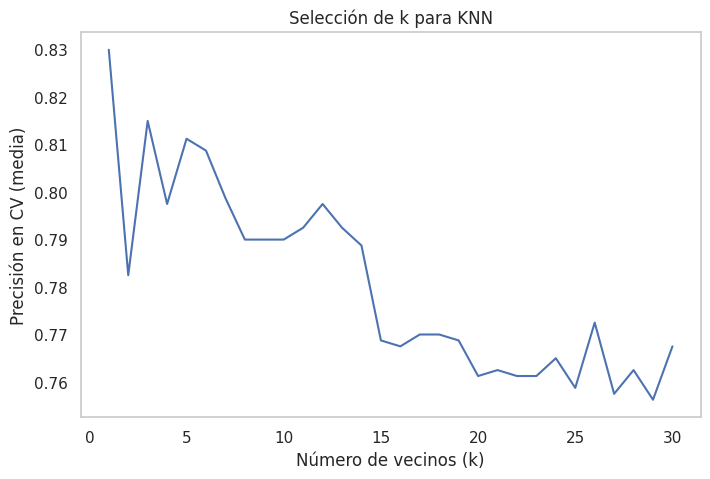

Mejor k encontrado: 1


In [22]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 31)
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k),
                             X_train_bal, y_train_bal, cv=5, scoring='accuracy').mean()
             for k in k_range]

# Visualizar
import matplotlib.pyplot as plt
plt.plot(k_range, cv_scores)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión en CV (media)')
plt.title('Selección de k para KNN')
plt.grid()
plt.show()

# Mejor k
best_k = k_range[np.argmax(cv_scores)]
print(f"Mejor k encontrado: {best_k}")


In [23]:
k_estable = 5  # valor que podemos decidir por robustez

knn_opt = KNeighborsClassifier(n_neighbors=k_estable)
knn_opt.fit(X_train_bal, y_train_bal)
y_pred_opt = knn_opt.predict(X_test_scaled)

print("Accuracy con k_estable:", accuracy_score(y_test, y_pred_opt))



Accuracy con k_estable: 0.7337662337662337


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy KNN mejorado:", accuracy_score(y_test, y_pred_opt))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_opt))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_opt))


Accuracy KNN mejorado: 0.7337662337662337

Matriz de confusión:
 [[73 27]
 [14 40]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       100
           1       0.60      0.74      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.74       154



In [25]:
import joblib

# Guardar el modelo entrenado
joblib.dump(knn_opt, 'modelo_knn_diabetes.pkl')

# Confirmar que el archivo fue creado
import os
print("Modelo guardado:", os.path.exists('modelo_knn_diabetes.pkl'))
joblib.dump(scaler, 'scaler_knn_diabetes.pkl')
print("Scaler guardado:", os.path.exists('scaler_knn_diabetes.pkl'))


Modelo guardado: True
Scaler guardado: True


## Modelado 2: Random Forest

Después de probar un modelo basado en vecinos cercanos (KNN), pasamos a entrenar un modelo de tipo **Random Forest**, que pertenece a la familia de los **métodos de ensamble**.

**Random Forest** construye múltiples árboles de decisión de forma aleatoria y luego combina sus predicciones por votación. Esta estrategia tiene varias ventajas:

- Es **menos sensible al ruido** y al sobreajuste que un solo árbol.
- Puede capturar **interacciones no lineales** y relaciones complejas entre variables.
- Es **robusto ante desequilibrios de clases**, especialmente si se ajustan los pesos o se combina con técnicas de remuestreo como SMOTE.
- Proporciona una estimación directa de la **importancia de cada variable**.

En contextos como este, donde las variables tienen distintas escalas y la relación con el objetivo puede ser no lineal, Random Forest es una alternativa potente y flexible que complementa bien los modelos basados en distancia como KNN.


## Modelado 2: Random Forest

In [26]:
# 8. Entrenamiento y evaluación de Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Random Forest NO requiere escalado, pero puedes usar X_train_scaled si quieres comparar
y_pred_rf = rf.predict(X_test)

print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_rf))

Accuracy Random Forest: 0.7597402597402597

Matriz de confusión:
 [[85 15]
 [22 32]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



### ¿Por qué Random Forest no requiere escalado?

A diferencia de algoritmos como KNN o SVM, que basan sus decisiones en **distancias entre puntos** en el espacio de características, Random Forest no utiliza distancia euclidiana ni productos escalares.

En su lugar, cada árbol de la Random Forest construye **reglas de decisión basadas en umbrales**, por ejemplo:  
> *¿Glucose > 125?*  
> *¿BMI ≤ 30?*

Estas comparaciones son **invariantes a la escala** de los datos. Por lo tanto, Random Forest **no necesita que las variables estén normalizadas o estandarizadas**, y puede manejar variables con unidades o rangos distintos sin afectar su funcionamiento.

Esto lo hace especialmente útil en contextos multivariados con unidades heterogéneas.


**Comparación:**  
- ¿Cuál modelo funcionó mejor según las métricas?  
- ¿Por qué crees que hay diferencia?

El Random Forest funcionó mejor en términos generales, ya que tiene mayor accuracy y F1 global, pero el KNN con SMOTE es útil si tu prioridad es detectar la mayor cantidad posible de casos de la clase 1, incluso a costa de más falsos positivos.
¿Por qué la diferencia?

KNN con SMOTE:
SMOTE ayuda a balancear las clases generando ejemplos sintéticos, lo que aumenta el recall de la clase 1.
Sin embargo, KNN es sensible al ruido y tiende a perder precisión porque clasifica por cercanía.

Random Forest:
Al ser un ensamble de árboles, maneja mejor la variabilidad y los desequilibrios.
Ofrece más precisión y mejor performance en la clase mayoritaria, pero puede dejar escapar algunos casos de la minoritaria (recall más bajo).

### Comparación de modelos: KNN (con SMOTE) vs Random Forest

| Métrica              | KNN (k=5, SMOTE) | Random Forest |
|----------------------|------------------|----------------|
| Accuracy             | 0.734            | **0.760** ✅    |
| Precision (clase 1)  | 0.60             | **0.68** ✅      |
| Recall (clase 1)     | **0.74** ✅       | 0.59           |
| F1-score (clase 1)   | **0.66** ✅       | 0.63           |
| F1-score (clase 0)   | 0.78             | **0.82** ✅     |
| Recall (clase 0)     | 0.73             | **0.85** ✅     |
| Macro avg F1-score   | 0.72             | **0.73** ✅     |

---

### Elección preferida: KNN con SMOTE

Aunque Random Forest alcanza una mayor precisión global, el modelo **KNN con SMOTE** es preferible en este caso porque:

- **Recupera un mayor número de casos positivos reales (diabéticos)**, con un recall de 0.74 frente a 0.59.
- En contextos médicos o de detección temprana, **minimizar los falsos negativos es crítico**, incluso si eso implica aceptar más falsos positivos.
- Además, SMOTE ayuda a mitigar el desbalance de clases, fortaleciendo el modelo en la clase minoritaria.

Por tanto, desde una perspectiva **preventiva y ética**, el modelo KNN ajustado es más útil para la tarea clínica implícita en este conjunto de datos.


## Importancia de variables en Random Forest

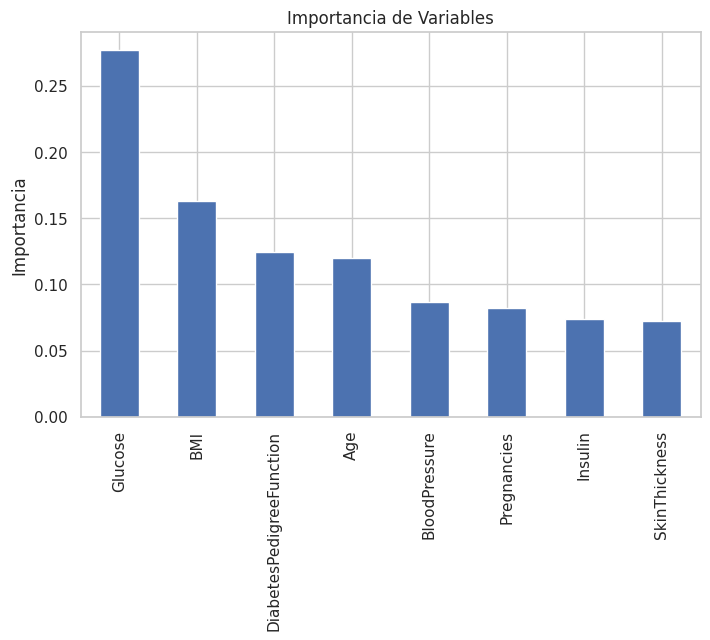

In [27]:
# 9. Visualización de importancia de variables
importances = rf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importancia de Variables')
plt.ylabel('Importancia')
plt.show()

### Importancia de variables en Random Forest

Random Forest permite estimar la **importancia relativa** de cada variable midiendo cuánto contribuye a reducir la impureza de las divisiones en los árboles.

Visualizar estas importancias ayuda a:

- Entender qué variables influyen más en las predicciones.
- Identificar posibles redundancias o irrelevancias.
- Guiar la selección de variables en futuros modelos.

Cuanto más alta la barra, mayor es la contribución de esa variable al desempeño del modelo.


**Reflexiona:**  
- ¿Qué variables resultaron más relevantes para el diagnóstico?  


En conclusión, el modelo confirma lo que la literatura médica sugiere: la glucosa es la variable más determinante, y su combinación con insulina e IMC permite discriminar mejor entre pacientes con y sin la condición.

## Conclusión: punto de partida para la recomendación

Este cuaderno ha cumplido su objetivo: construir un modelo confiable para automatizar el diagnóstico de diabetes tipo 2 a partir de variables clínicas. A través de un proceso cuidadoso de limpieza, escalado, balanceo y comparación de modelos, elegimos finalmente un clasificador (KNN con SMOTE) que prioriza la detección de casos positivos, criterio clave en contextos clínicos.

Este modelo será guardado y utilizado en el siguiente cuaderno, donde implementaremos un **sistema de recomendación personalizado**. Dicho sistema podrá sugerir acciones preventivas, derivaciones clínicas u orientación educativa según el perfil individual del paciente y su predicción diagnóstica.

El diagnóstico es el núcleo: a partir de él, la recomendación será posible, ética y útil.


### ¿Por qué guardamos el modelo con `joblib` y no con `model.save()`?

En esta actividad trabajamos con modelos de **scikit-learn**, como K-Nearest Neighbors (`KNeighborsClassifier`) y Random Forest. Estos modelos no forman parte del ecosistema de redes neuronales de Keras/TensorFlow, por lo tanto **no se pueden guardar usando `model.save()`**, que es exclusivo de modelos construidos con `keras.Sequential` o `keras.Model`.

En cambio, la forma estándar y eficiente de guardar modelos de `scikit-learn` es usando **`joblib.dump()`**, que permite serializar objetos Python (como clasificadores, pipelines o transformadores) y almacenarlos en archivos `.pkl`.

Esto nos permite:
- Reutilizar el modelo en otros cuadernos o aplicaciones.
- Evitar volver a entrenarlo desde cero.
- Separar la etapa de entrenamiento de la de despliegue o recomendación.

En resumen:  
> Usamos `joblib` porque estamos trabajando con modelos clásicos de machine learning, no con redes neuronales.
